## Домашнее задание 1

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import seaborn as sns

Na = 2000
Nb = 2000
a = pd.DataFrame({'distance': np.random.randn(Na)*10 + 130, 'angle': np.random.rand(Na) * 2*np.pi})
b = pd.DataFrame({'distance': np.random.randn(Nb)*10 + 40, 'angle': np.random.rand(Nb) * 2*np.pi})
a['class'] = 'a'
b['class'] = 'b'
ring = pd.concat([a, b])
ring['x1'] = ring.distance * np.cos(ring.angle)
ring['x2'] = ring.distance * np.sin(ring.angle)
Xr = ring[['x1', 'x2']]
ring.sample(5)

distance     angle class         x1          x2
1314  130.437956  0.992899     a  71.253497  109.256577
875   144.203491  0.842722     a  95.957872  107.641691
1047  128.382412  2.147743     a -70.028366  107.601448
1064  120.093228  1.504972     a   7.899296  119.833153
298    37.506122  0.344138     b  35.307008   12.654025

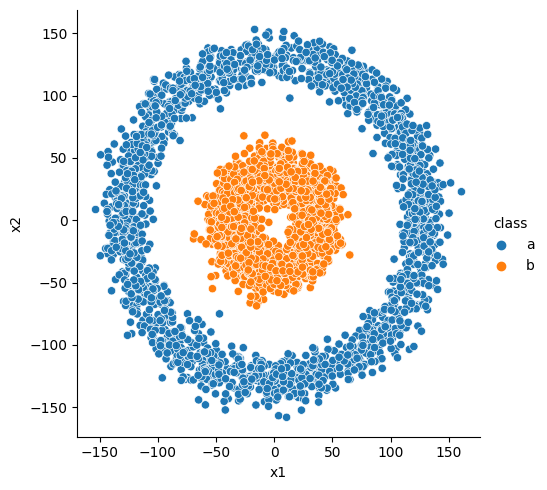

In [2]:
sns.relplot(x='x1', y='x2', hue='class', data=ring)

In [6]:
from sklearn.cluster import SpectralClustering


model = SpectralClustering(
         n_clusters=2,
         eigen_solver="arpack",
         affinity="nearest_neighbors")
model.fit(Xr)
model

SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=2)

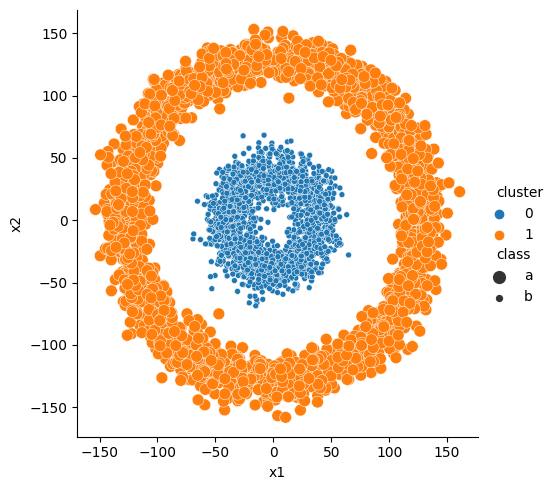

In [7]:
ring['cluster']=model.labels_
sns.relplot(x='x1', y='x2', hue='cluster', size='class', data=ring)

## Домашнее задание 2

* Набор данных был взят с kaggle ["Wine_Quality_Data"](https://www.kaggle.com/code/chaitnyapol/wine-quality-data).

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [10]:
cd gdrive/MyDrive/ABD/Z6

/content/gdrive/MyDrive/ABD/Z6


In [11]:
ls

Customers.csv  Wine_Quality_Data.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv("Wine_Quality_Data.csv")
data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5    red  
1         9.8        5    red  
2         9.8        5    red  
3         9.8        6    red  
4         9.4        5    red  
...       ...      ...    ...  
6492     11.2        6  white  
6493      9.6        5  white  
6494      9.4        6  white  
6495     12.8        7  white  
6496     11.8        6  white  

[6497 rows x 13 columns]

In [17]:
from sklearn.preprocessing import LabelEncoder

L=LabelEncoder()
data["color"]=L.fit_transform(data["color"])
data

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  color  
0         9.4        5      0  
1         9.8        5      0  
2         9.8        5      0  
3         9.8        6      0  
4         9.4        5      0  
...       ...      ...    ...  
6492     11.2        6      1  
6493      9.6        5      1  
6494      9.4        6      1  
6495     12.8        7      1  
6496     11.8        6      1  

[6497 rows x 13 columns]

In [18]:
data.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality        color  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378     0.753886  
std       0.160787     0.148806     1.192712     0.873255     0.430779  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     1.000000  
50%       3.210000     0.510000    10.300000     6.000000     1.000000  
75%       3.320000     0.600000    11.300000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


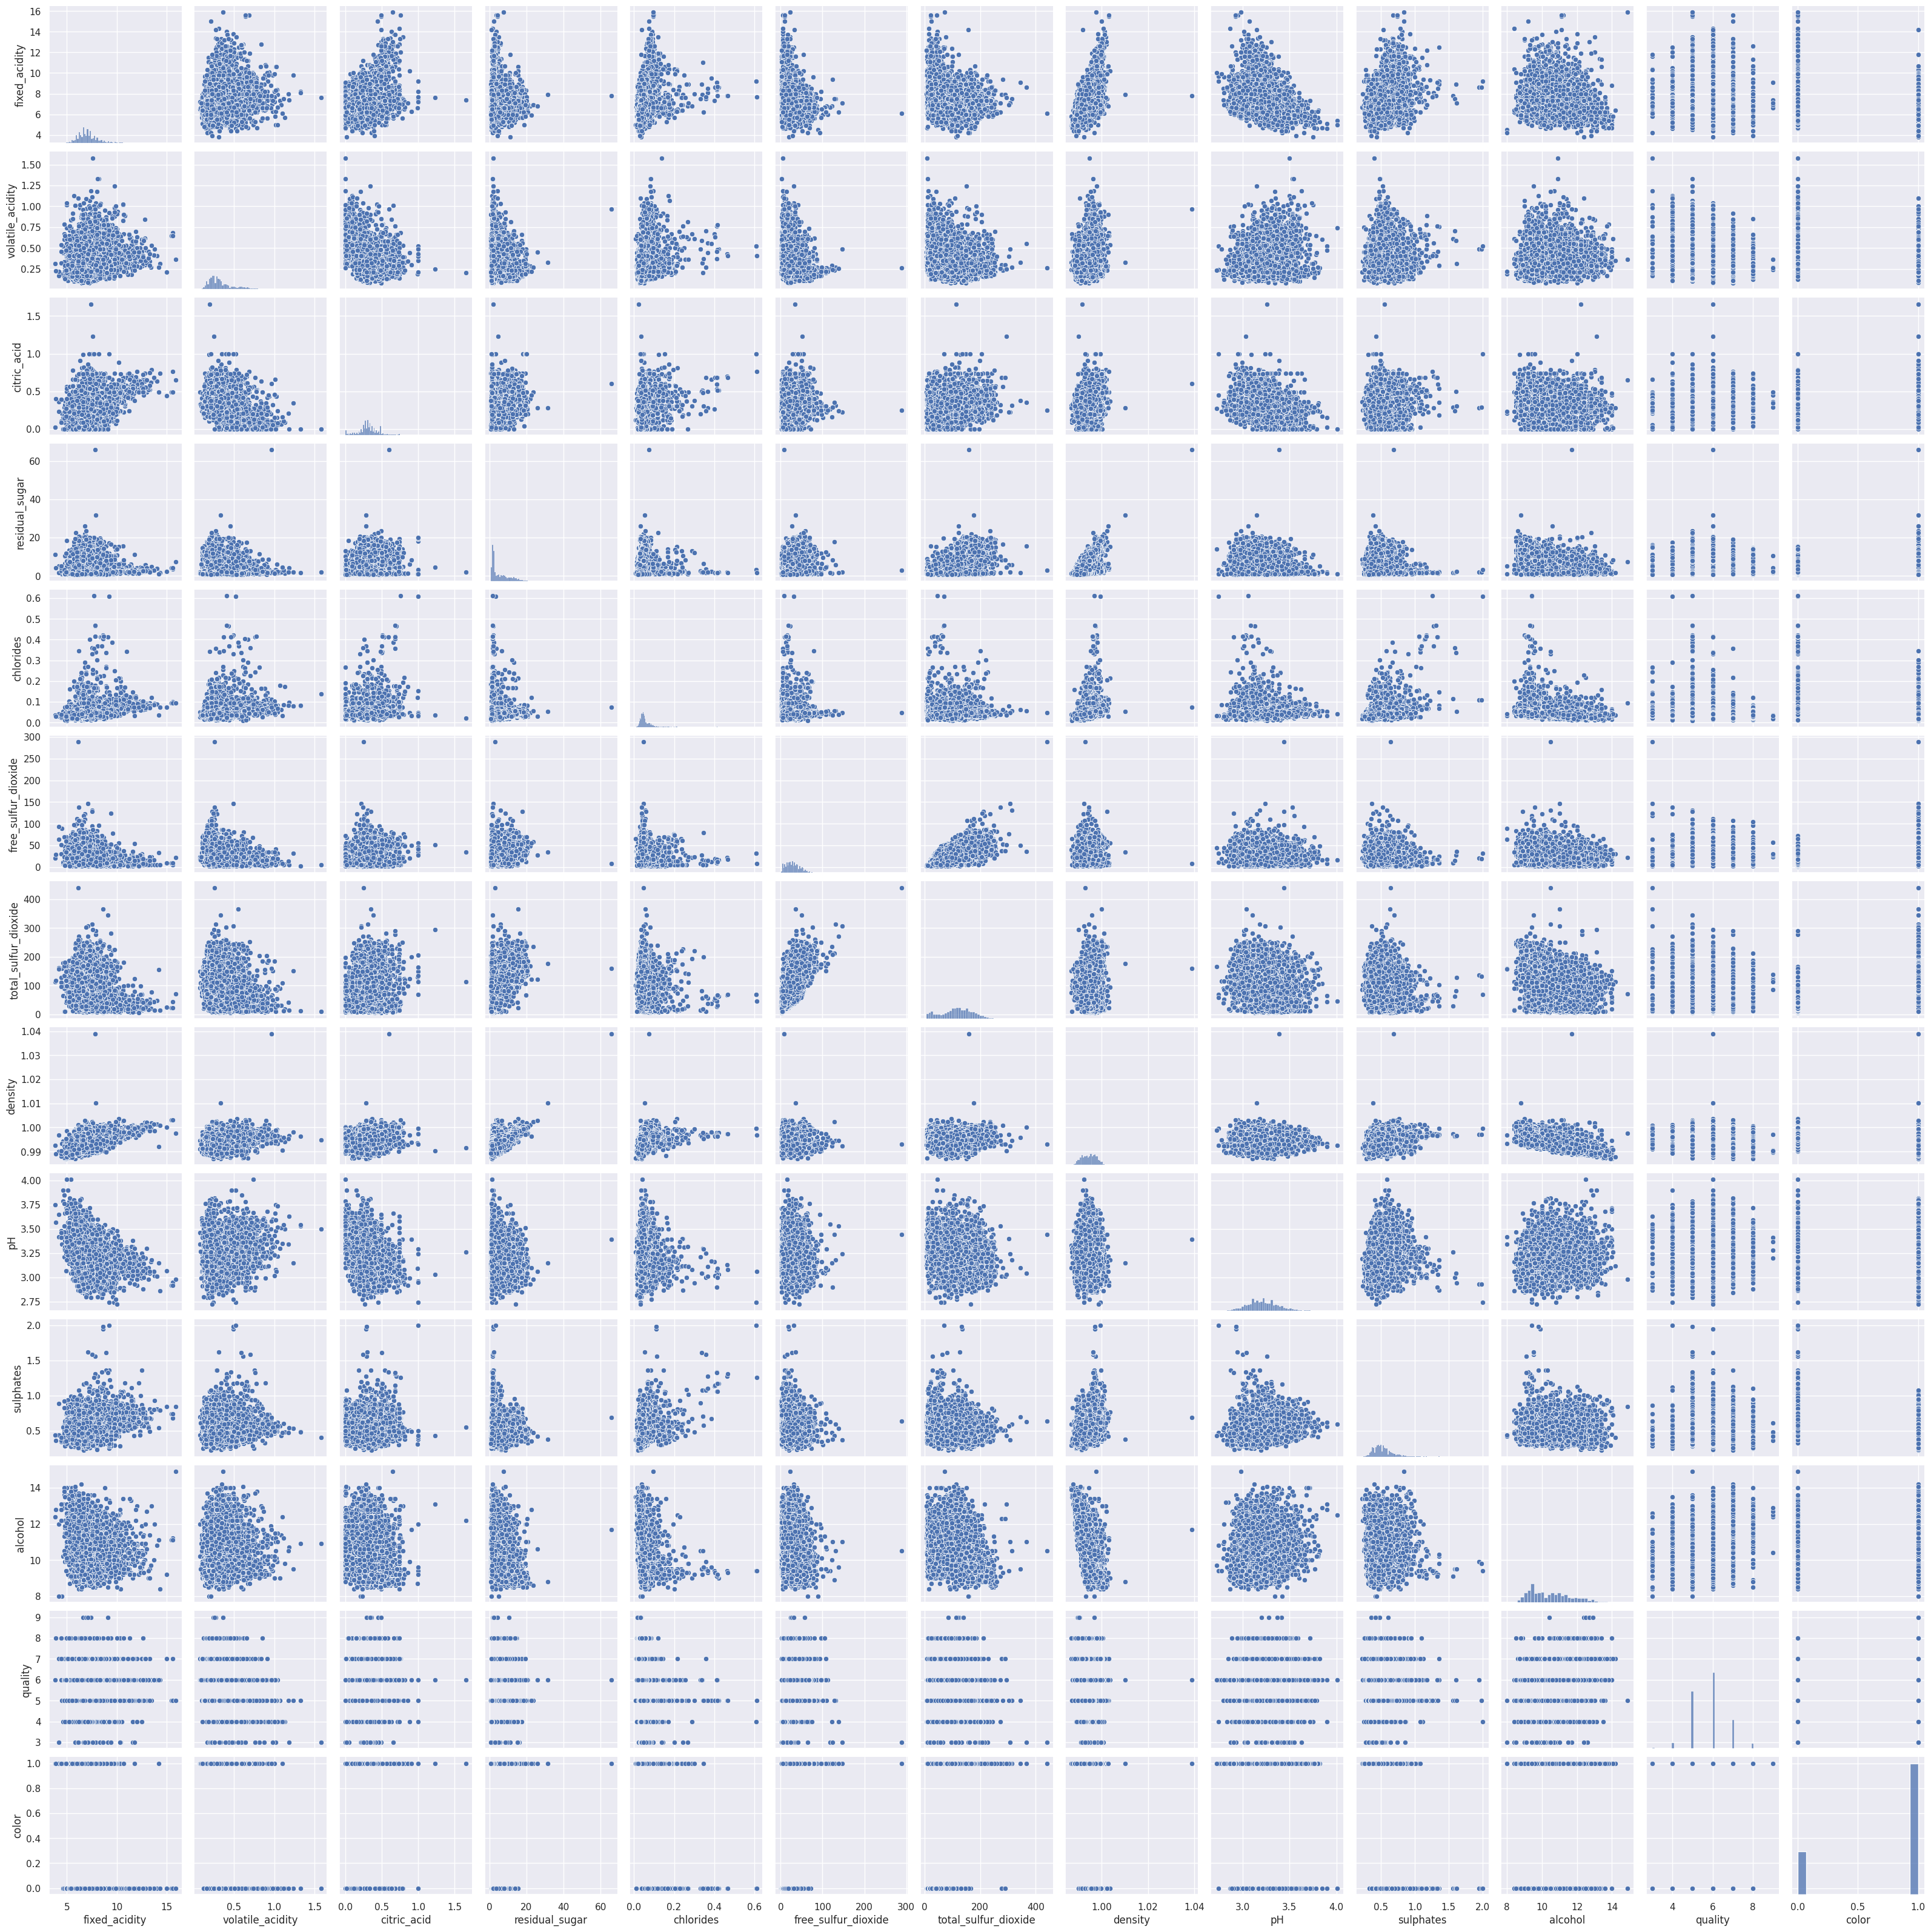

In [20]:
import seaborn as sns; sns.set()

sns.pairplot(data)

<Axes: >

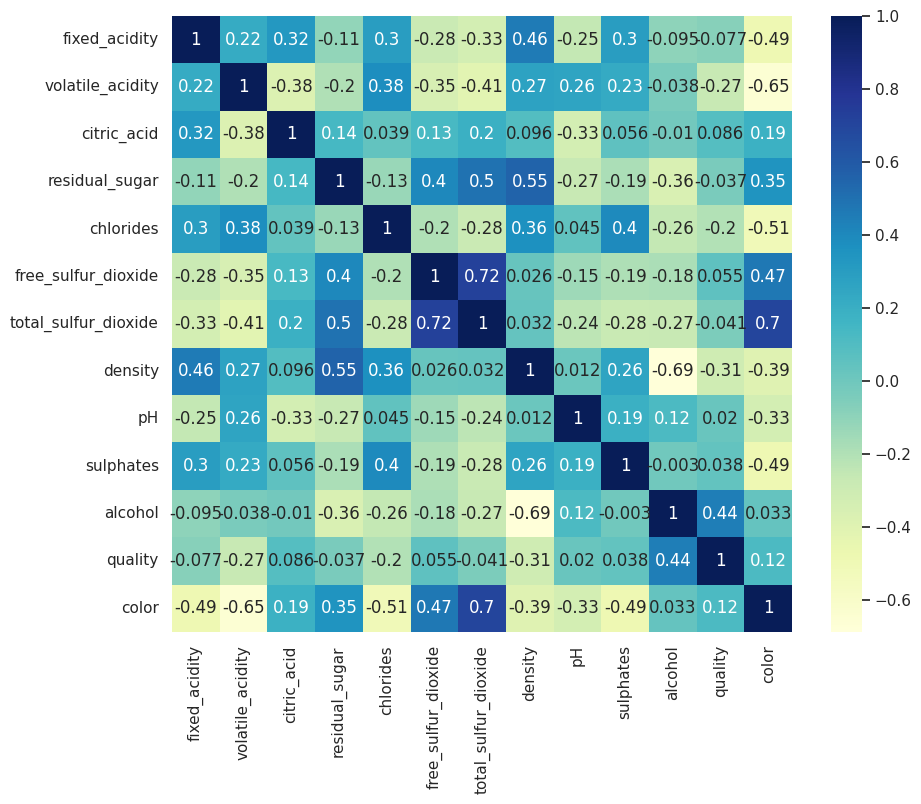

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'fixed_acidity'),
  Text(2, 0, 'volatile_acidity'),
  Text(3, 0, 'citric_acid'),
  Text(4, 0, 'residual_sugar'),
  Text(5, 0, 'chlorides'),
  Text(6, 0, 'free_sulfur_dioxide'),
  Text(7, 0, 'total_sulfur_dioxide'),
  Text(8, 0, 'density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'sulphates'),
  Text(11, 0, 'alcohol'),
  Text(12, 0, 'quality'),
  Text(13, 0, 'color')])

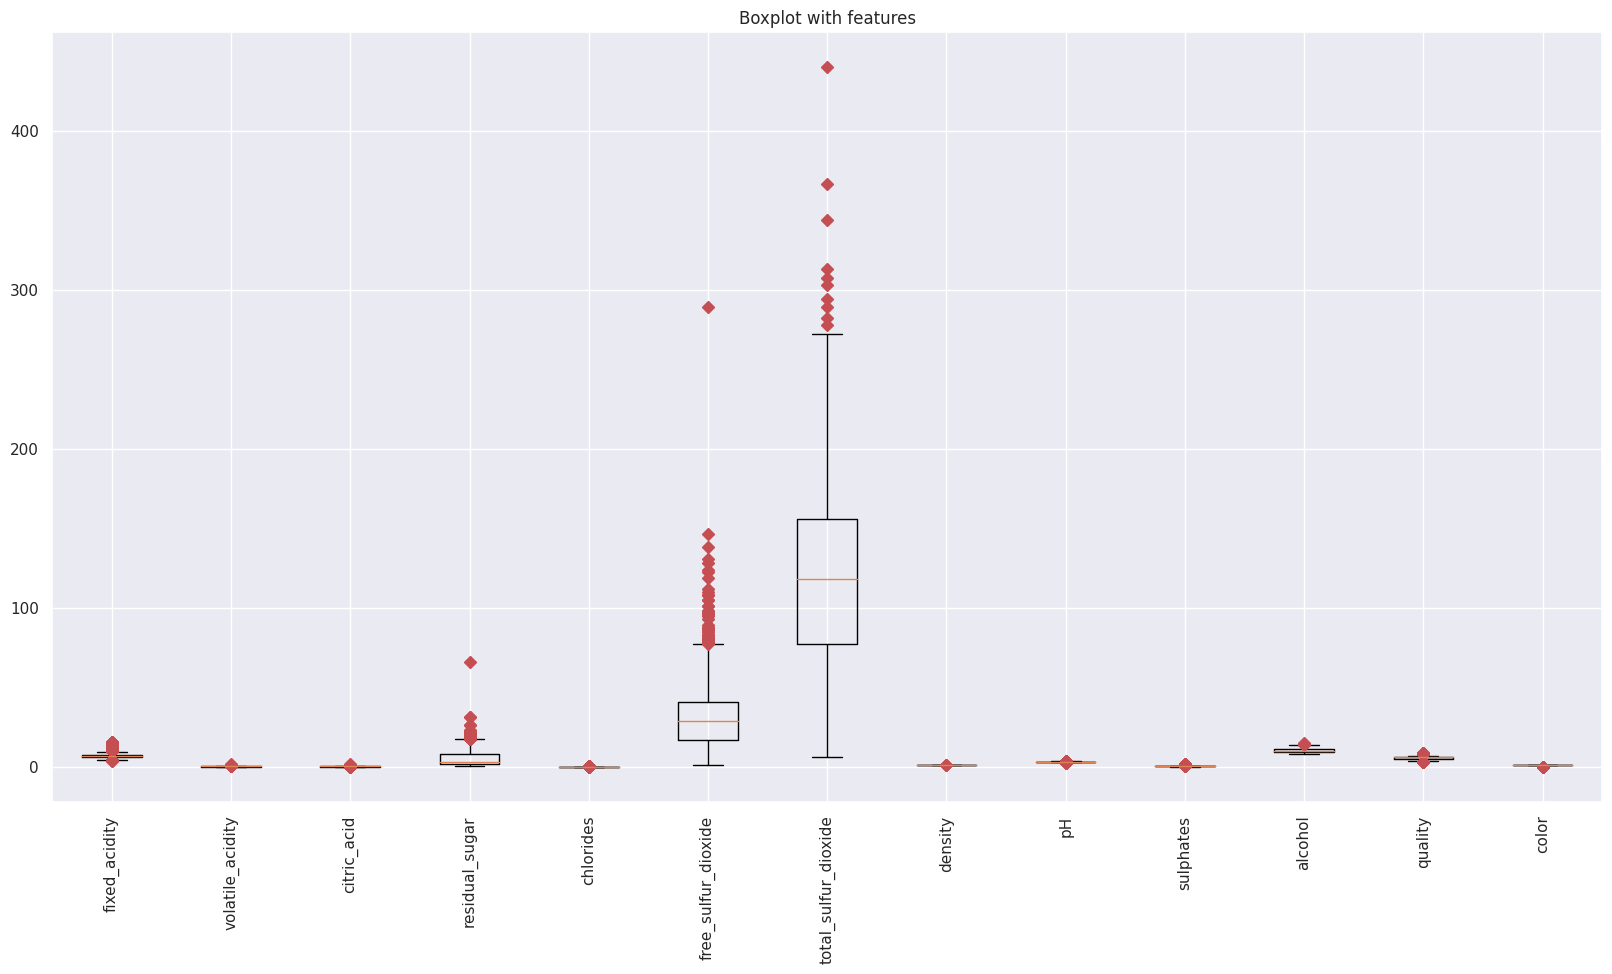

In [23]:
features = list(data.keys())

plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(data.values, 0, 'rD', labels = features)
plt.xticks(rotation = 90)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
data_scaled = sc.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0          0.142473          2.188833    -2.192833       -0.744778   0.569958   
1          0.451036          3.282235    -2.192833       -0.597640   1.197975   
2          0.451036          2.553300    -1.917553       -0.660699   1.026697   
3          3.073817         -0.362438     1.661085       -0.744778   0.541412   
4          0.142473          2.188833    -2.192833       -0.744778   0.569958   
...             ...               ...          ...             ...        ...   
6492      -0.783214         -0.787650    -0.197054       -0.807837  -0.486252   
6493      -0.474652         -0.119460     0.284686        0.537425  -0.257883   
6494      -0.551792         -0.605417    -0.885253       -0.891916  -0.429160   
6495      -1.323198         -0.301694    -0.128234       -0.912936  -0.971538   
6496      -0.937495         -0.787650     0.422326       -0.975995  -1.028631   

      free_sulfur_dioxide  total_sulfur_dioxide   density        pH  \
0               -1.100140             -1.446359  1.034993  1.813090   
1               -0.311320             -0.862469  0.701486 -0.115073   
2               -0.874763             -1.092486  0.768188  0.258120   
3               -0.762074             -0.986324  1.101694 -0.363868   
4               -1.100140             -1.446359  1.034993  1.813090   
...                   ...                   ...       ...       ...   
6492            -0.367664             -0.420128 -1.186161  0.320319   
6493             1.491697              0.924588  0.067824 -0.426067   
6494            -0.029599             -0.083949 -0.719251 -1.421248   
6495            -0.593041             -0.101642 -2.003251  0.755710   
6496            -0.480353             -0.313966 -1.763127  0.258120   

      sulphates   alcohol   quality     color  
0      0.193097 -0.915464 -0.937230 -1.750190  
1      0.999579 -0.580068 -0.937230 -1.750190  
2      0.797958 -0.580068 -0.937230 -1.750190  
3      0.327510 -0.580068  0.207999 -1.750190  
4      0.193097 -0.915464 -0.937230 -1.750190  
...         ...       ...       ...       ...  
6492  -0.210144  0.593818  0.207999  0.571367  
6493  -0.478971 -0.747766 -0.937230  0.571367  
6494  -0.478971 -0.915464  0.207999  0.571367  
6495  -1.016626  1.935402  1.353228  0.571367  
6496  -1.419867  1.096912  0.207999  0.571367  

[6497 rows x 13 columns]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'fixed_acidity'),
  Text(2, 0, 'volatile_acidity'),
  Text(3, 0, 'citric_acid'),
  Text(4, 0, 'residual_sugar'),
  Text(5, 0, 'chlorides'),
  Text(6, 0, 'free_sulfur_dioxide'),
  Text(7, 0, 'total_sulfur_dioxide'),
  Text(8, 0, 'density'),
  Text(9, 0, 'pH'),
  Text(10, 0, 'sulphates'),
  Text(11, 0, 'alcohol'),
  Text(12, 0, 'quality'),
  Text(13, 0, 'color')])

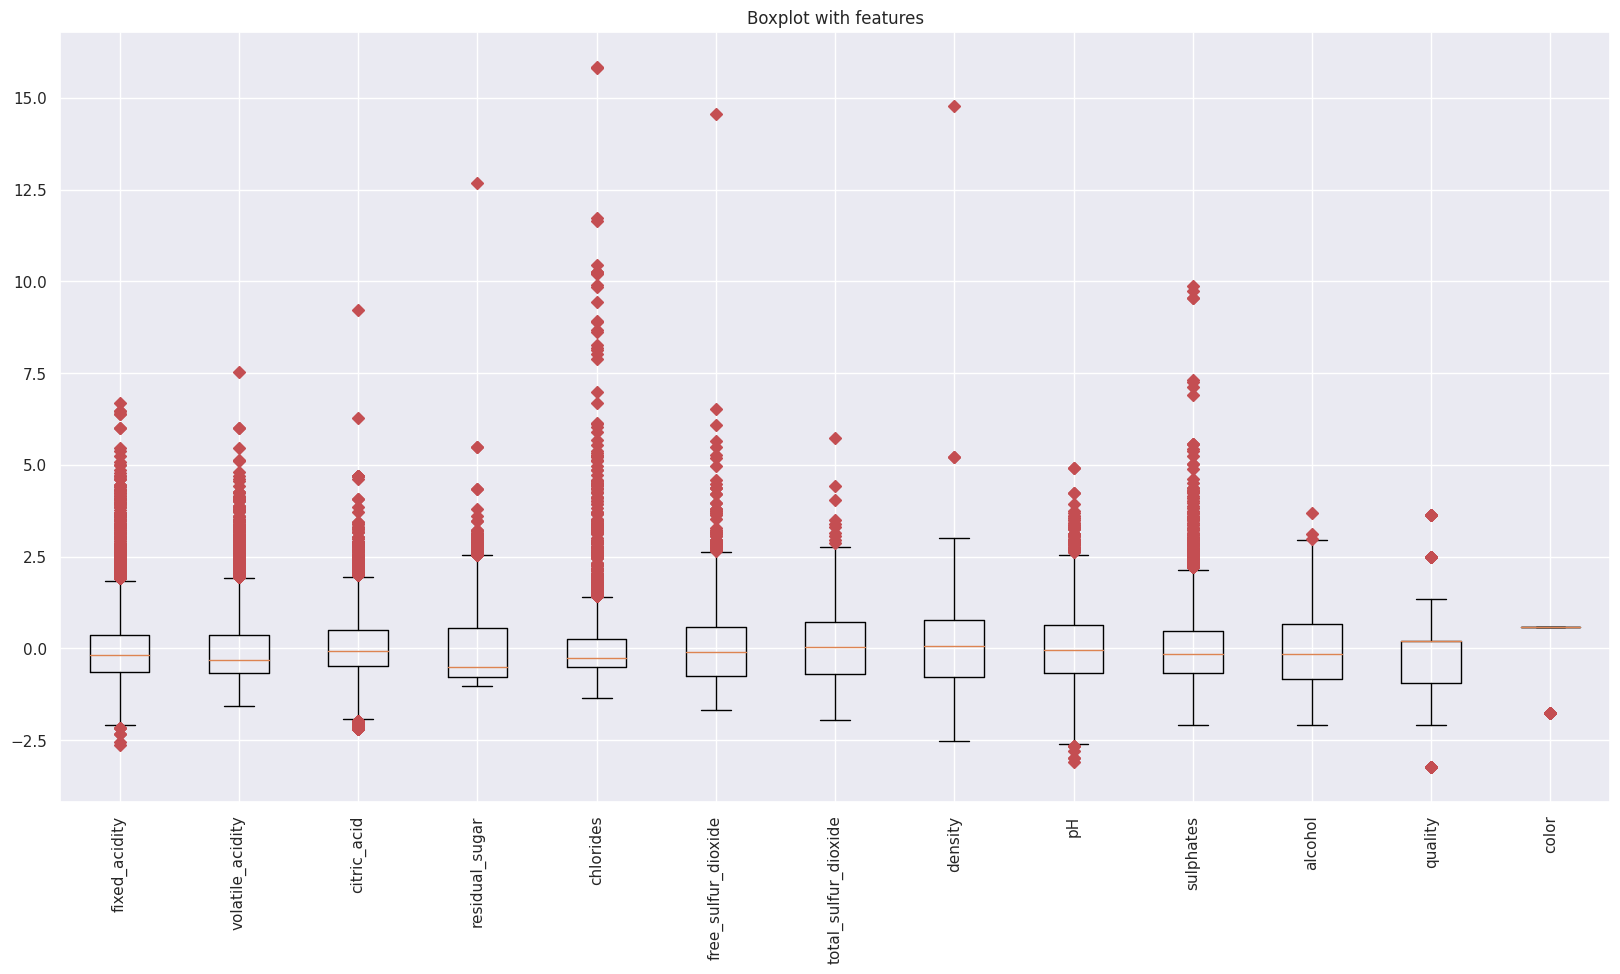

In [25]:
plt.figure(figsize=(20, 10))
plt.title('Boxplot with features')
plt.boxplot(data_scaled.values, 0, 'rD', labels = data_scaled.columns)
plt.xticks(rotation = 90)

### KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

<Axes: xlabel='num_clusters', ylabel='distortions'>

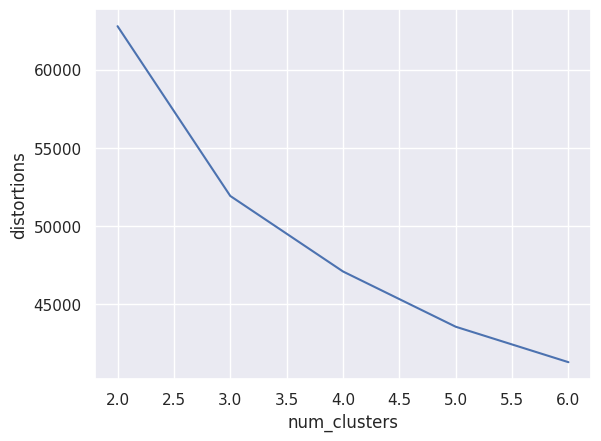

In [27]:
from sklearn.cluster import KMeans

distortions = []
num_clusters = range(2, 7)
for i in num_clusters:
  kmeans = KMeans(n_clusters=i).fit(data_scaled)
  centroids = kmeans.cluster_centers_
  distortion = kmeans.inertia_  # Сумма квадратов расстояний от выборок до центра их ближайшего кластера, взвешенная по весам выборок
  distortions.append(distortion)
elbow_df = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data=elbow_df)

In [28]:
kmeans = KMeans(n_clusters=3).fit(data_scaled)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("centroids ", centroids)
print("labels ", labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


centroids  [[-0.18410052 -0.33233057  0.25952606  1.14698044 -0.07643214  0.80952121
   0.9464132   0.73681614 -0.38214884 -0.25911256 -0.80821643 -0.30040507
   0.56780045]
 [-0.34390639 -0.40296565  0.00661432 -0.42742157 -0.43921579 -0.08660969
   0.03769048 -0.86129723 -0.05482978 -0.28937004  0.57561384  0.31911488
   0.55880915]
 [ 0.86811061  1.16079066 -0.3319165  -0.61522056  0.91328643 -0.83531114
  -1.23570835  0.69906387  0.57283933  0.85876635 -0.07832223 -0.22525265
  -1.74140716]]
labels  [2 2 2 ... 1 1 1]


### Силуэтный анализ (Silhouette score)

In [29]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate Silhoutte Score
score = silhouette_score(data_scaled, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.235


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.31699671601823604


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.23525570249487981


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.23937563615507307


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.1869531257319647


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.19107193052528335


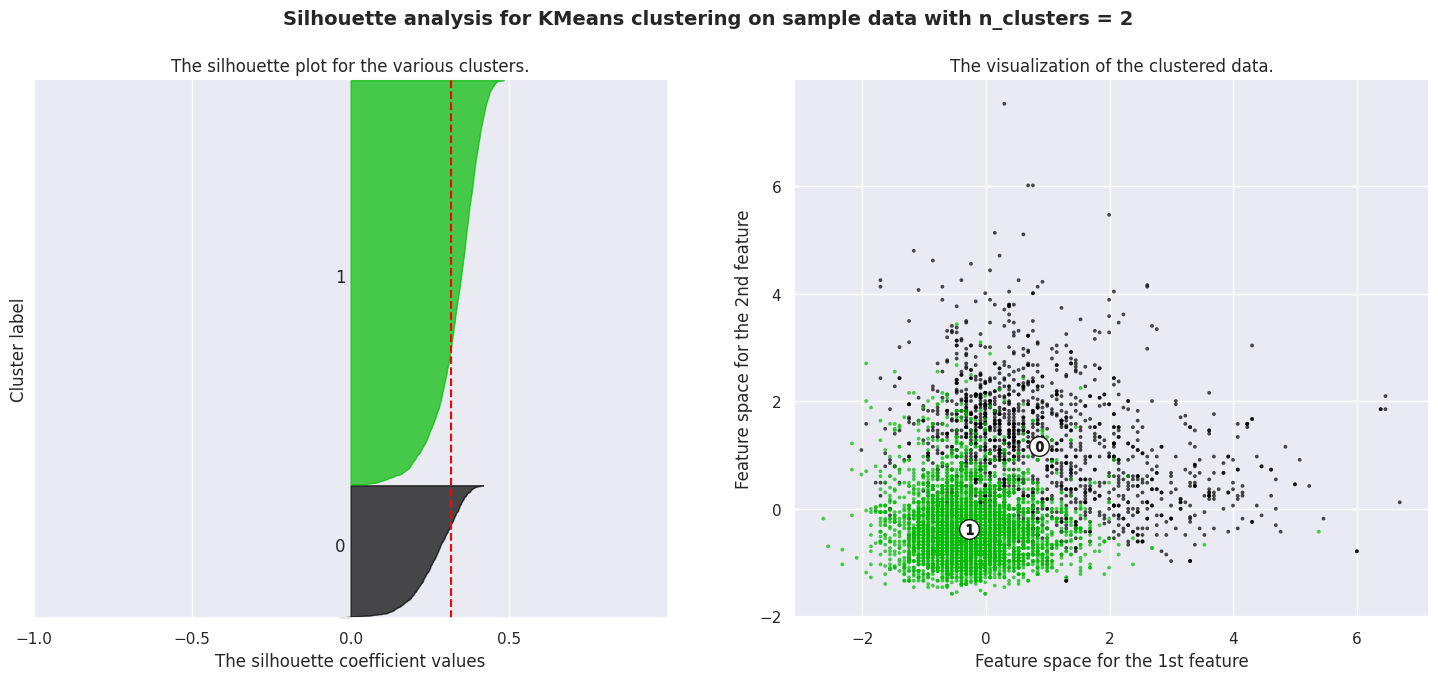

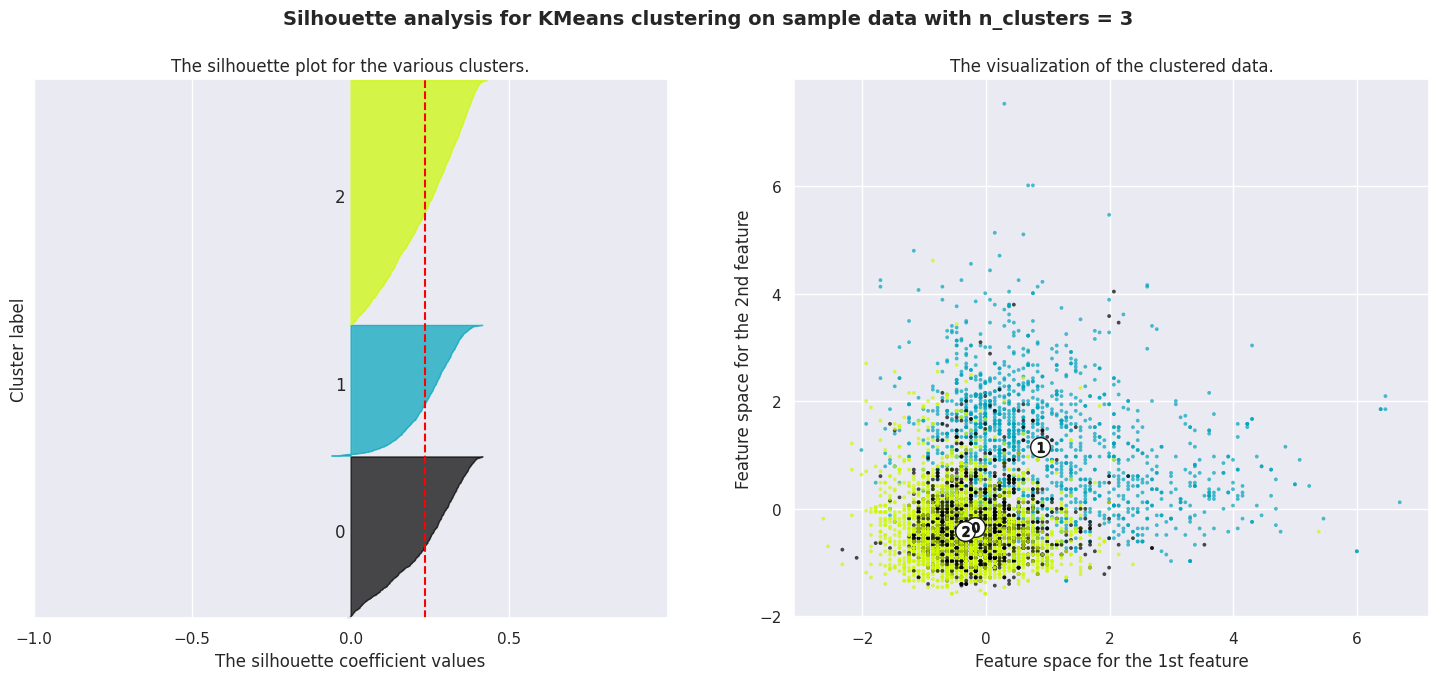

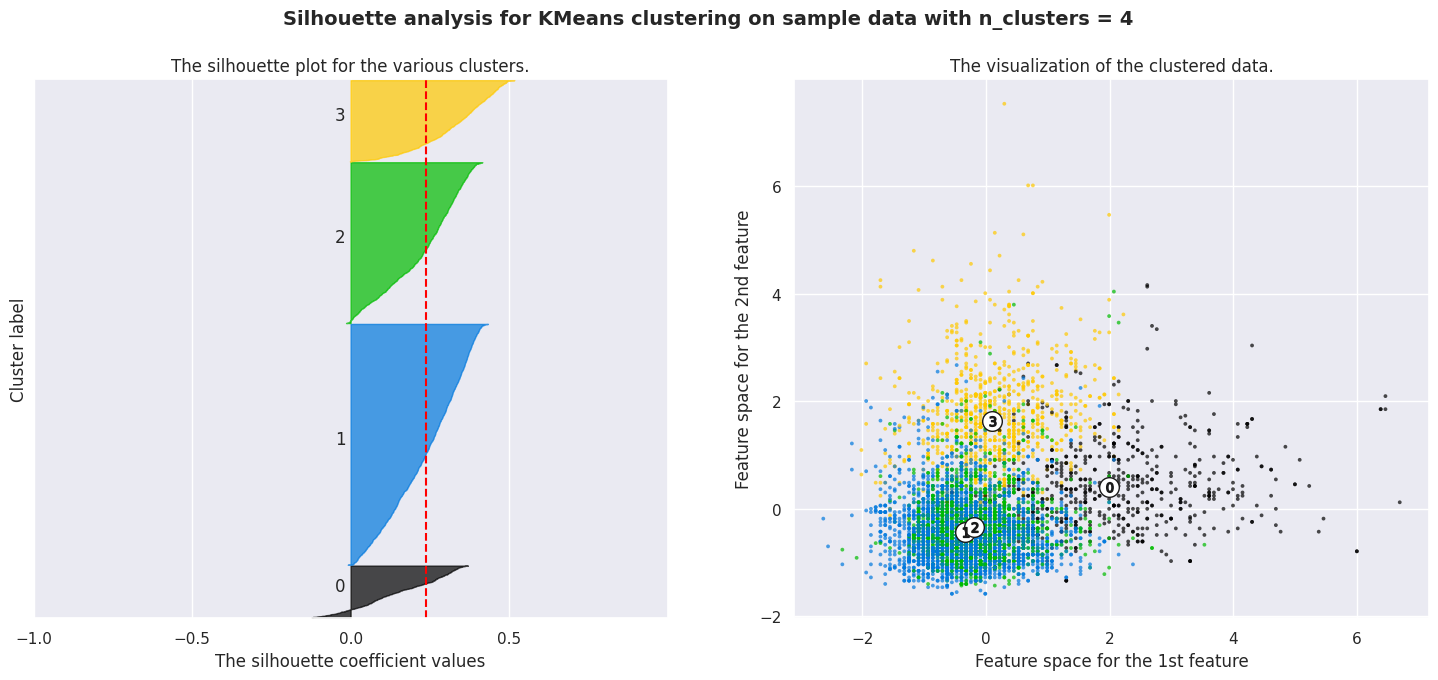

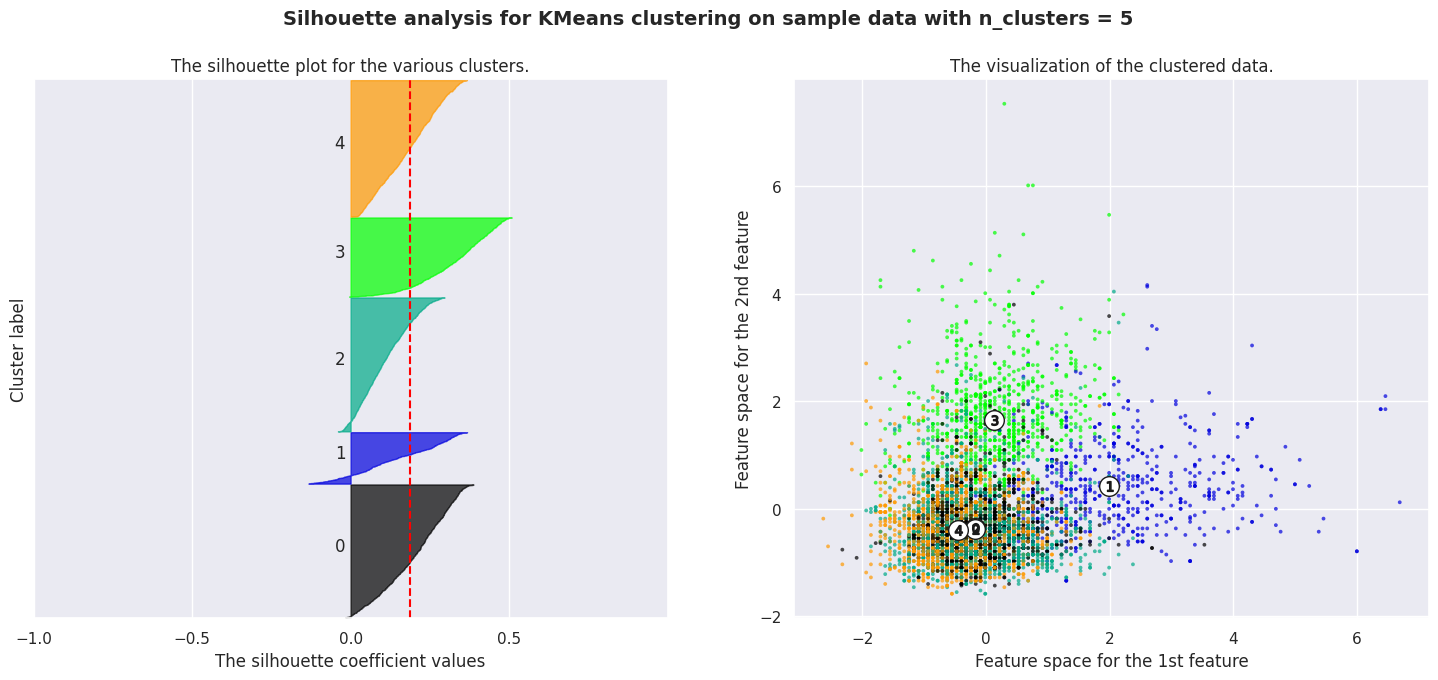

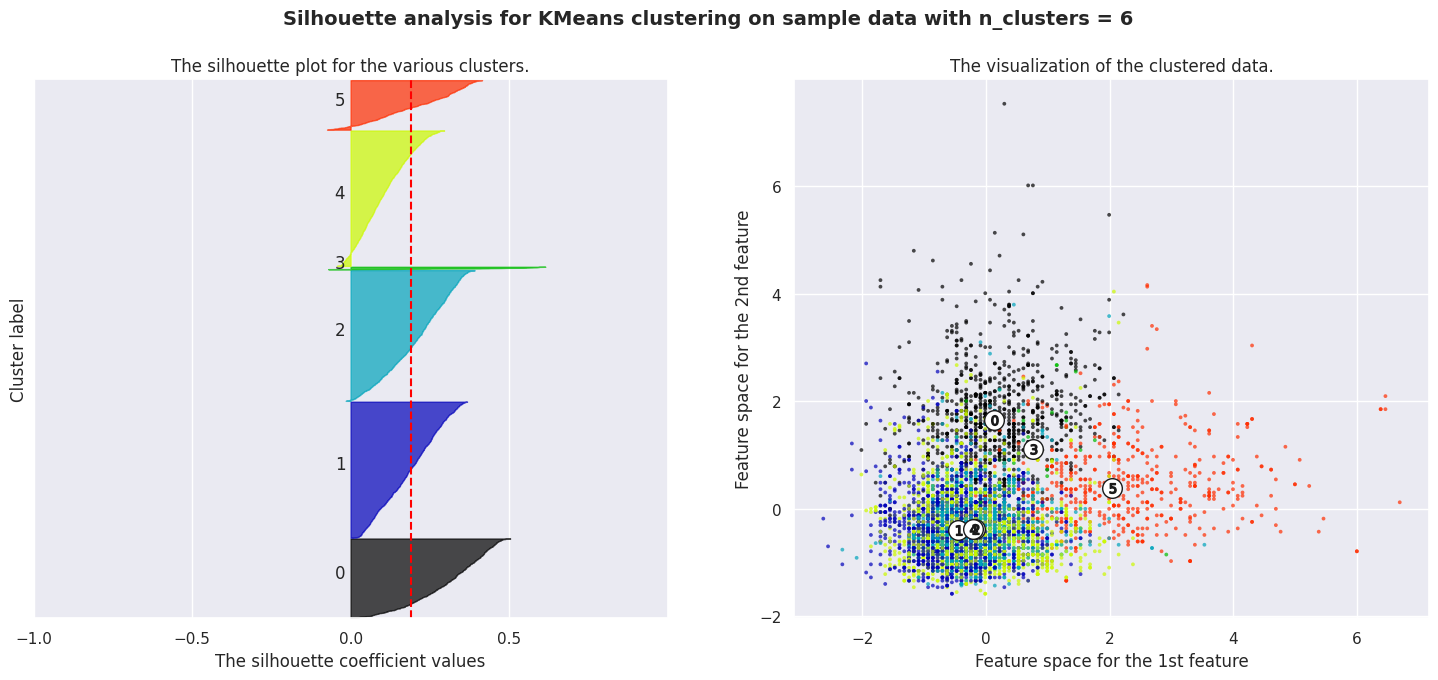

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


interest_numb_of_clusters = list(range(2, 7))
kmeanss = []

for n_clusters in interest_numb_of_clusters:
    # картинка с 1 строкой и 2 столбцами
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1-й подсюжет - это силуэтный сюжет
    # Коэффициент силуэта может варьироваться от -1, 1
    ax1.set_xlim([-1, 1])
    # (N_clusters + 1) * 10 для вставки пробела между силуэтами
    # графики отдельных кластеров, чтобы четко их разграничить.
    ax1.set_ylim([0, data_scaled.shape[0] + (n_clusters + 1) * 10])

    # Инициализируем кластеризатор значением n_clusters и случайным генератором
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_scaled)
    kmeanss.append(clusterer)

    # Silhouette_score дает среднее значение для всех образцов.
    # Это дает представление о плотности и разделении сформированных
    # clusters
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Вычислить оценки силуэта для каждого образца
    sample_silhouette_values = silhouette_samples(data_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Сложить оценки силуэтов для образцов, принадлежащих кластеру i, и отсортировать их
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Обозначить графики силуэтов номерами кластеров посередине
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Вычислить новый y_lower для следующего графика
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # Вертикальная линия для средней оценки силуэта всех значений
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Очистить метки / отметки оси y
    ax1.set_xticks(np.arange(-1, 1, 0.5))

    # 2-й график, показывающий фактические сформированные кластеры
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_scaled.iloc[:, 0], data_scaled.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Маркировка кластеров
    centers = clusterer.cluster_centers_
    # Рисуем белые круги в центрах кластеров
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

* Значение 3 для n_clusters выглядит оптимальным.

### PCA

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(data_scaled)
X = pca.transform(data_scaled)
X[:5]

array([[3.83674905, 0.09471521],
       [3.8014386 , 0.73238039],
       [3.77101134, 0.48848423],
       [2.48257318, 1.37984119],
       [3.83674905, 0.09471521]])

In [32]:
clusters_x_y = pd.DataFrame(X, columns=['X', 'Y'])
clusters_x_y.head()

X         Y
0  3.836749  0.094715
1  3.801439  0.732380
2  3.771011  0.488484
3  2.482573  1.379841
4  3.836749  0.094715

In [33]:
labels = pd.DataFrame(labels, columns=['label'])
dfs = [clusters_x_y, labels]
final_df = pd.concat(dfs, axis=1)
final_df

X         Y  label
0     3.836749  0.094715      2
1     3.801439  0.732380      2
2     3.771011  0.488484      2
3     2.482573  1.379841      2
4     3.836749  0.094715      2
...        ...       ...    ...
6492 -0.618824 -1.893143      1
6493 -1.651627  1.249227      0
6494 -0.925044 -0.540524      1
6495 -1.162099 -3.647187      1
6496 -1.302869 -2.633579      1

[6497 rows x 3 columns]

In [34]:
pca = PCA(n_components=2)
pca.fit(centroids)
centroids_pca = pca.transform(centroids)
centroids_pca

array([[-1.87563077, -1.30104174],
       [-0.96975527,  1.60996394],
       [ 2.84538603, -0.3089222 ]])

In [35]:
import matplotlib
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

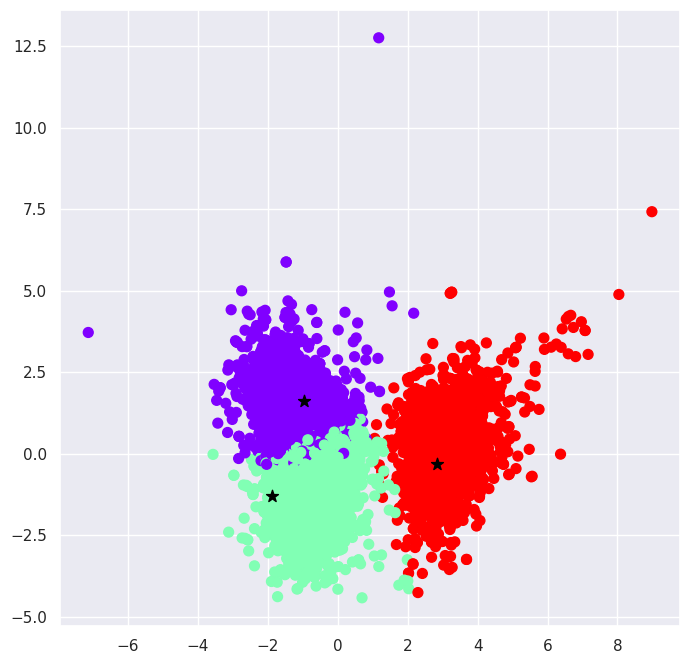

In [36]:
plt.figure(figsize=(8, 8))

plt.scatter(final_df["X"], final_df["Y"], c=final_df["label"], cmap='rainbow', s = 50)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='black', s=80, marker="*")
plt.show()

### TSNE

In [37]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random')
X = tsne.fit_transform(data_scaled)
X[:5]

array([[ 33.05981 ,  71.85913 ],
       [ 29.886665,  63.366886],
       [ 29.469208,  63.771587],
       [-38.277367,  63.117664],
       [ 33.059345,  71.85919 ]], dtype=float32)

In [38]:
clusters_x_y = pd.DataFrame(X, columns=['X', 'Y'])
clusters_x_y.head()

X          Y
0  33.059811  71.859131
1  29.886665  63.366886
2  29.469208  63.771587
3 -38.277367  63.117664
4  33.059345  71.859192

In [39]:
labels = pd.DataFrame(labels, columns=['label'])
dfs = [clusters_x_y, labels]
final_df2 = pd.concat(dfs, axis=1)
final_df2

X          Y  label
0     33.059811  71.859131      2
1     29.886665  63.366886      2
2     29.469208  63.771587      2
3    -38.277367  63.117664      2
4     33.059345  71.859192      2
...         ...        ...    ...
6492  23.964928  -2.822009      1
6493 -56.265820 -19.537739      0
6494  -8.634194 -13.550475      1
6495  72.174950  -9.328368      1
6496  33.016254   7.127725      1

[6497 rows x 3 columns]

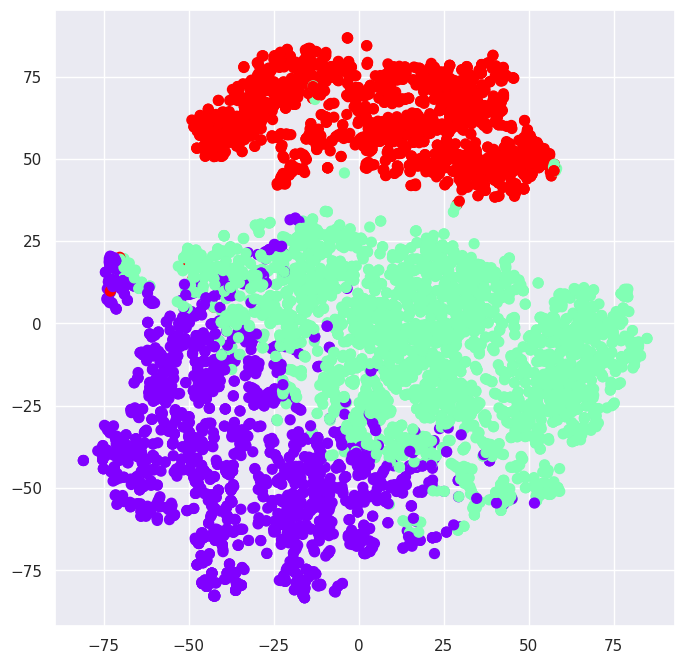

In [40]:
plt.figure(figsize=(8, 8))

plt.scatter(final_df2["X"], final_df2["Y"], c=final_df2["label"], cmap='rainbow', s = 50)
plt.show()

### DBSCAN

In [57]:
from sklearn.cluster import DBSCAN
from collections import Counter

outlier_detection = DBSCAN(eps=0.95, min_samples=40)
clusters = outlier_detection.fit_predict(final_df)
print(Counter(outlier_detection.labels_))

Counter({1: 2951, 2: 1944, 0: 1558, -1: 44})


In [58]:
final_df[outlier_detection.labels_ == -1]

X          Y  label
17    6.593058   3.060231      2
81    6.598415   4.206198      2
83    6.803158   2.975532      2
106   6.664556   4.242120      2
142   2.024031  -3.667945      2
144   2.024031  -3.667945      2
151   8.984290   7.419788      2
169   7.159957   3.042645      2
226   6.389264   3.259257      2
258   8.039414   4.881262      2
451   6.251103   3.361140      2
517   5.223790   3.539415      2
588   2.029201  -4.145444      1
692   6.535105   4.126204      2
730   5.895784   3.545796      2
754   6.101443   3.263826      2
821   2.292902  -4.263043      2
1051  6.738978   3.869577      2
1126  1.988135  -3.255858      1
1165  5.910815   3.196252      2
1228  1.899268  -3.880284      1
1260  6.419700   3.826098      2
1269  1.746932  -4.036316      1
1270  2.003152  -3.907398      1
1299  6.371595  -0.017385      2
1319  6.966831   4.044108      2
1370  7.074895   3.775597      2
1372  7.074895   3.775597      2
1434  3.257583   4.951535      2
1435  3.257583   4.951535      2
1474  3.218083   4.917749      2
1476  3.218083   4.917749      2
2286  2.171881   4.306329      0
2633  1.478013   4.957437      0
2816  1.554396   4.532501      0
3207 -2.749136   4.993496      0
3237  0.207322   4.335351      0
3252 -1.475529   5.877176      0
3262 -1.475529   5.877176      0
3434  0.568167   4.008250      0
4380  1.171485  12.754076      0
4751 -3.567260  -0.024104      1
5309  0.693958  -4.423759      1
6344 -7.136248   3.715174      0

Text(0.5, 1.0, 'DBSCAN for Outlier Detection')

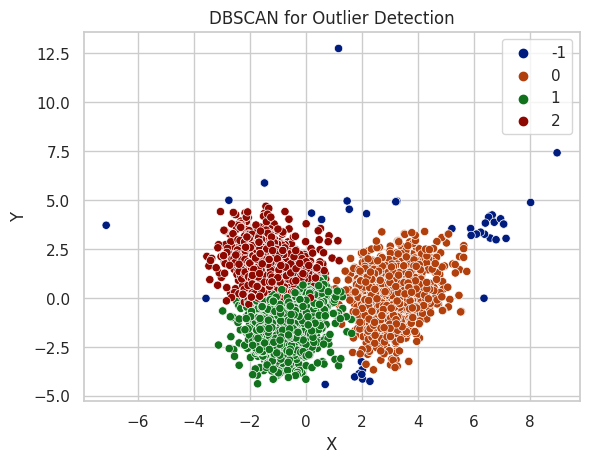

In [59]:
fig = plt.figure()
sns.set_style("whitegrid")
colors = outlier_detection.labels_

sns.scatterplot(data=final_df, x="X", y="Y", hue=colors, palette="dark")
plt.title("DBSCAN for Outlier Detection")

### Препроцессинг, пайплайн

In [60]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

nkm = Pipeline([('prep', StandardScaler()), ('clusterer', KMeans(3))])
nkm.fit(data)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('prep', StandardScaler()),
                ('clusterer', KMeans(n_clusters=3))])

In [61]:
print(nkm['prep'].transform(data).shape)
print(nkm['clusterer'].transform(data).shape)

(6497, 13)
(6497, 3)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [62]:
final_df3 = pd.DataFrame(PCA(n_components=2).fit_transform(nkm['prep'].transform(data)))
final_df3['cluster']=nkm['clusterer'].labels_
final_df3

0         1  cluster
0     3.836749  0.094715        2
1     3.801439  0.732380        2
2     3.771011  0.488484        2
3     2.482573  1.379841        2
4     3.836749  0.094715        2
...        ...       ...      ...
6492 -0.618824 -1.893143        1
6493 -1.651627  1.249227        0
6494 -0.925044 -0.540524        1
6495 -1.162099 -3.647187        1
6496 -1.302869 -2.633579        1

[6497 rows x 3 columns]

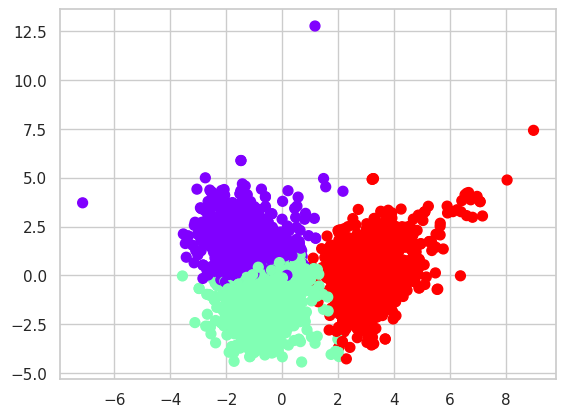

In [63]:
plt.scatter(final_df3[0], final_df3[1], c=final_df3["cluster"], cmap='rainbow', s = 50)
plt.show()